In [8]:
# Load MINST dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

# Fetch data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

# Binary classification target
y_binary = (y == 5)

# Split data (for clean eval)
X_train, X_test, y_train_5, y_test_5 = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Using small sample
X_tiny = X_train[:1000]
y_tiny = y_train_5[:1000]

knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_tiny, y_tiny, cv=3, scoring="accuracy")

print("KNN Accuracy Scores:", knn_scores)
print("Mean Accuracy:", knn_scores.mean())

KNN Accuracy Scores: [0.96706587 0.97597598 0.96996997]
Mean Accuracy: 0.9710039380698063


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Cross-validated predictions (not accuracy scores)
y_knn_pred = cross_val_predict(knn_clf, X_tiny, y_tiny, cv=3)

# Confusion Matrix + Scores
print("Confusion Matrix:")
print(confusion_matrix(y_tiny, y_knn_pred))
print("Precision:", precision_score(y_tiny, y_knn_pred))
print("Recall:", recall_score(y_tiny, y_knn_pred))
print("F1 Score:", f1_score(y_tiny, y_knn_pred))

In [14]:
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_tiny, y_tiny)

# Get predicted probabilities for class 1 (is it a 5?)
y_scores_knn = knn_clf.predict_proba(X_tiny)[:, 1]

# Get precision, recalls, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_tiny, y_scores_knn)


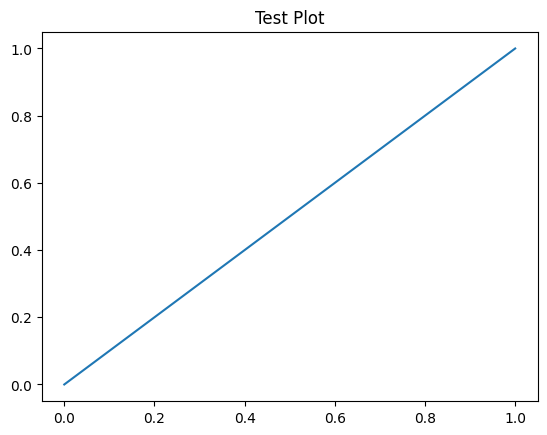

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1])
plt.title("Test Plot")
plt.show()

In [21]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision vs. Recall Curve")
    plt.grid(True)
    plt.legend(loc="best")
    plt.show()

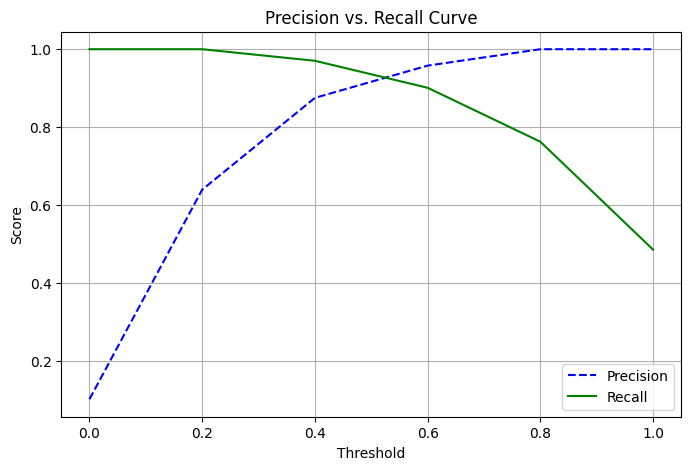

In [22]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, for various threshold values
fpr, tpr, roc_thresholds = roc_curve(y_tiny, y_scores_knn)

# Calculate AUC score
auc_score = roc_auc_score(y_tiny, y_scores_knn)

print("AUC Score:", auc_score)

AUC Score: 0.9978248659126202


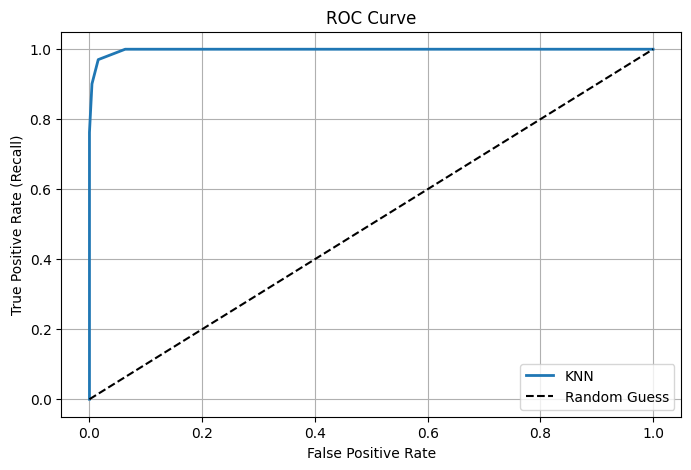

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, linewidth=2, label="KNN")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.grid(True)
plt.legend(loc="lower right")
plt.show()